In [4]:
import pandas as pd
import numpy as np
import pymongo
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import svm 

%matplotlib inline

In [112]:
mongo_url = 'mongodb+srv://hughkohl:' + '*Tiger13' + '@cluster0-bdg3q.azure.mongodb.net/test?retryWrites=true&w=majority'

cluster = pymongo.MongoClient(mongo_url)
db = cluster["job_scrape"]
collection = db["jobs"]

In [113]:
mongo_docs = collection.find()
df = pd.DataFrame(list(mongo_docs))

In [114]:
# drop nonessentials
df.drop(['date', '_id', 'url'], axis=1, inplace=True)

In [115]:
df = df.loc[df.duplicated()==False]

In [116]:
# clean job role column to replace + with _  and description column to lowercase
df['job'] = df['job'].str.replace('+', '_', True)

In [117]:
special_skills = ['R ', 'CS']

In [118]:
for skill in special_skills:
    df[skill] = 0

In [119]:
for i in range((df.shape[0])):
    for skill in special_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [120]:
df['description'] = df['description'].str.lower()

In [121]:
df = df.reset_index()

In [122]:
df.drop('index', axis=1, inplace=True)

In [123]:
df.groupby('job').count()

,role,company,description,R,CS
job,,,,,
account_executive,78,78,78,78,78
business_analyst,98,98,98,98,98
consultant,261,261,261,261,261
customer_success,376,376,376,376,376
data_analyst,79,79,79,79,79
data_engineer,320,320,320,320,320
data_scientist,76,76,76,76,76
developer,204,204,204,204,204
human_resources,95,95,95,95,95


In [39]:
df_ae = df.query('job == "account_executive"')
df_ba  = df.query('job == "business_analyst"')
df_c  = df.query('job == "constultant"')
df_cs  = df.query('job == "customer_success"').iloc[:120]
df_da  = df.query('job == "data_analyst"')
df_de  = df.query('job == "data_engineer"').iloc[:120]
df_ds  = df.query('job == "data_scientist"')
df_dev  = df.query('job == "developer"')
df_hr  = df.query('job == "human_resources"')
df_pm  = df.query('job == "product_manager"')
df_pjm  = df.query('job == "project_manager"')
df_se  = df.query('job == "software_engineer"').iloc[:120]
df_sa  = df.query('job == "solutions_architect"')
df_sole  = df.query('job == "solutions_engineer"').iloc[:120]

In [40]:
df_ae = df_ae.append(df_ba)
df_ae =  df_ae.append(df_c)
df_ae = df_ae.append(df_cs)
df_ae = df_ae.append(df_da)
df_ae = df_ae.append(df_de)
df_ae = df_ae.append(df_ds)
df_ae = df_ae.append(df_dev)
df_ae = df_ae.append(df_hr)
df_ae = df_ae.append(df_pm)
df_ae = df_ae.append(df_pjm)
df_ae = df_ae.append(df_se)
df_ae = df_ae.append(df_sa)
df_ae = df_ae.append(df_sole)

In [41]:
df = df_ae
df = df.reset_index()

In [42]:
df.drop('index', axis=1, inplace=True)

In [124]:
industry_skills = ['data', 'digital marketing', 'strategy', 'analy', 'data mining', 'competitive analysis', 'research', 'machine learning', 
                   'business intelligence', 'blockchain', 'artificial intelligence', 'cloud', 'database', 
                   'hardware', 'visualiz', 'trend analysis',  'data architecture', 'model', 
                   'data management', 'etl', 'statistical', 'data warehouse', 'computer science', 'math', 'script',
                   'apis', 'web design', 'algorithms', 'sales', 'deals', 'predict', 'deep learning', 'neural', ''
                   'deploy', 'prototyp', 'test', 'train', 'budget', 'forecast', 'report', 'implement', 'propos', 'architect', 'pipe',
                   'robotic', 'insight', 'integrat', 'go-to-market', 'market', 'onboard', 'automat', 'phd', 'mba']

In [125]:
# ONLY RUN ONCE
for skill in industry_skills:
    df[skill] = 0

In [126]:
#  industry skills +1 if exists in description
for i in range((df.shape[0])):
    for skill in industry_skills:
        try:
            if skill in df['description'][i]:
                df[skill][i] += 1
        except:
            pass

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
df.head()

,job,role,company,description,R,CS,data,digital marketing,strategy,analy,...,pipe,robotic,insight,integrat,go-to-market,market,onboard,automat,phd,mba
0,solutions_engineer,Solutions Engineer,Pinterest,millions of people across the world come to pi...,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,solutions_engineer,Data Engineer (NCMEC),Thorn,thorn is a non-profit focused on building tech...,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,solutions_engineer,Application Design Engineer,Devotion Business Solutions,job description job description our client is ...,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,solutions_engineer,Manufacturing Engineer,Lithos Energy,who are we?\nlithos energy designs and builds ...,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,solutions_engineer,DevOps engineer,MoData,main requirements:\nexperience in deploying an...,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_2 = df.groupby('job').sum()

In [128]:
df_perc = (df.groupby('job').sum()/df.groupby('job').count())*100

        index  business_analyst
0       analy         93.877551
1        data         77.551020
2      report         54.081633
3   implement         50.000000
4      market         42.857143
5        test         34.693878
6       train         34.693878
7       model         34.693878
8    strategy         32.653061
9    integrat         30.612245
10      sales         29.591837
11   research         28.571429
12     script         28.571429
13    insight         23.469388
14  architect         22.448980


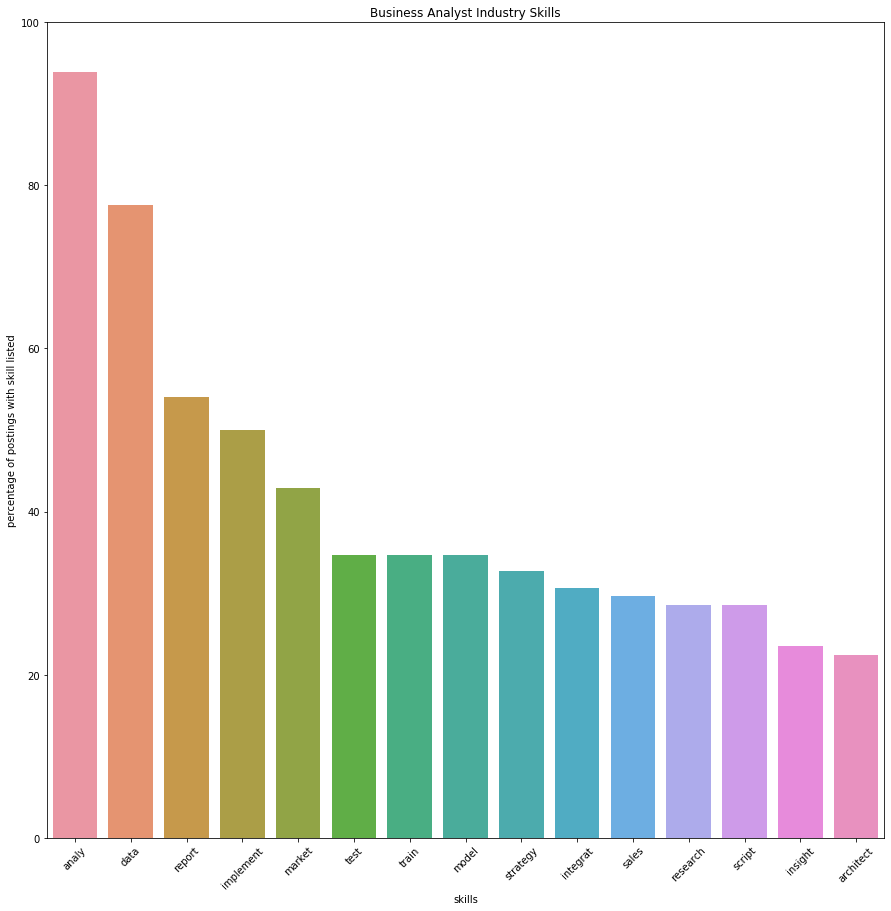

In [129]:
df_ba = df_perc.loc['business_analyst'].sort_values(ascending=False).head(15)
df_ba = df_ba.reset_index()

print(df_ba)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
plt.xticks(rotation=45);
sns.barplot(x='index', y='business_analyst', ax=ax, data=df_ba);
plt.title('Business Analyst Industry Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

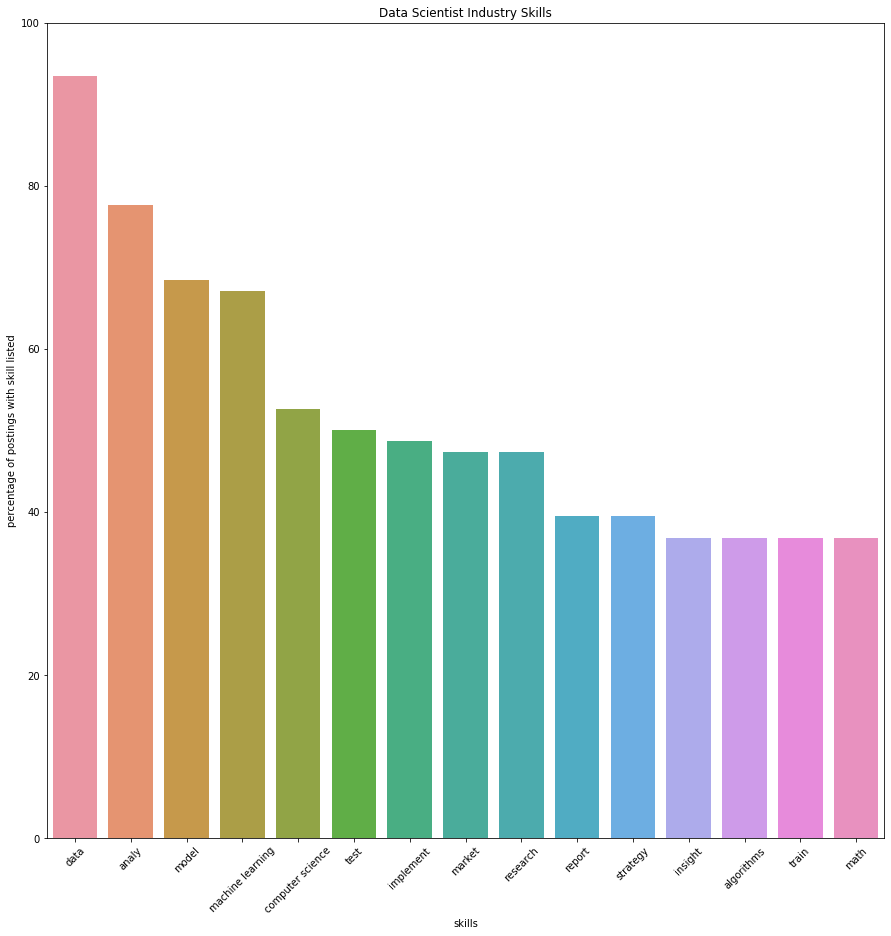

In [130]:
df_ds = df_perc.loc['data_scientist'].sort_values(ascending=False).head(15)
df_ds = df_ds.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_scientist', ax=ax, data=df_ds)
plt.xticks(rotation=45);
plt.title('Data Scientist Industry Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

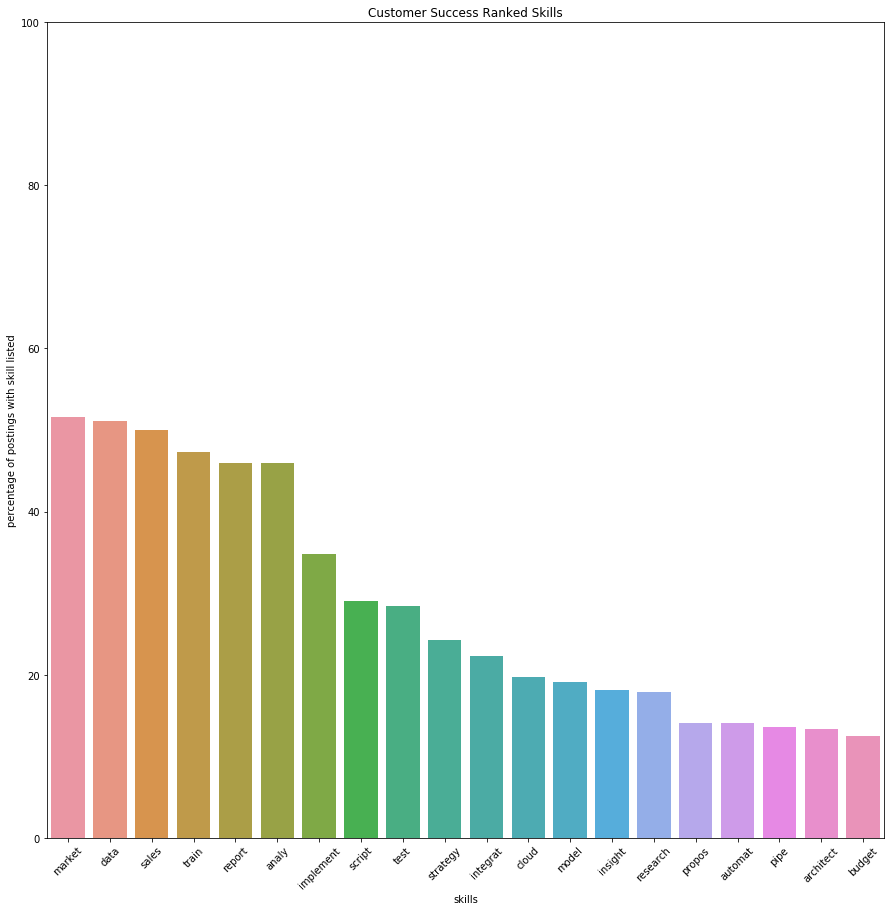

In [131]:
df_cs = df_perc.loc['customer_success'].sort_values(ascending=False).head(20)
df_cs = df_cs.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='customer_success', ax=ax, data=df_cs)
plt.xticks(rotation=45);
plt.title('Customer Success Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

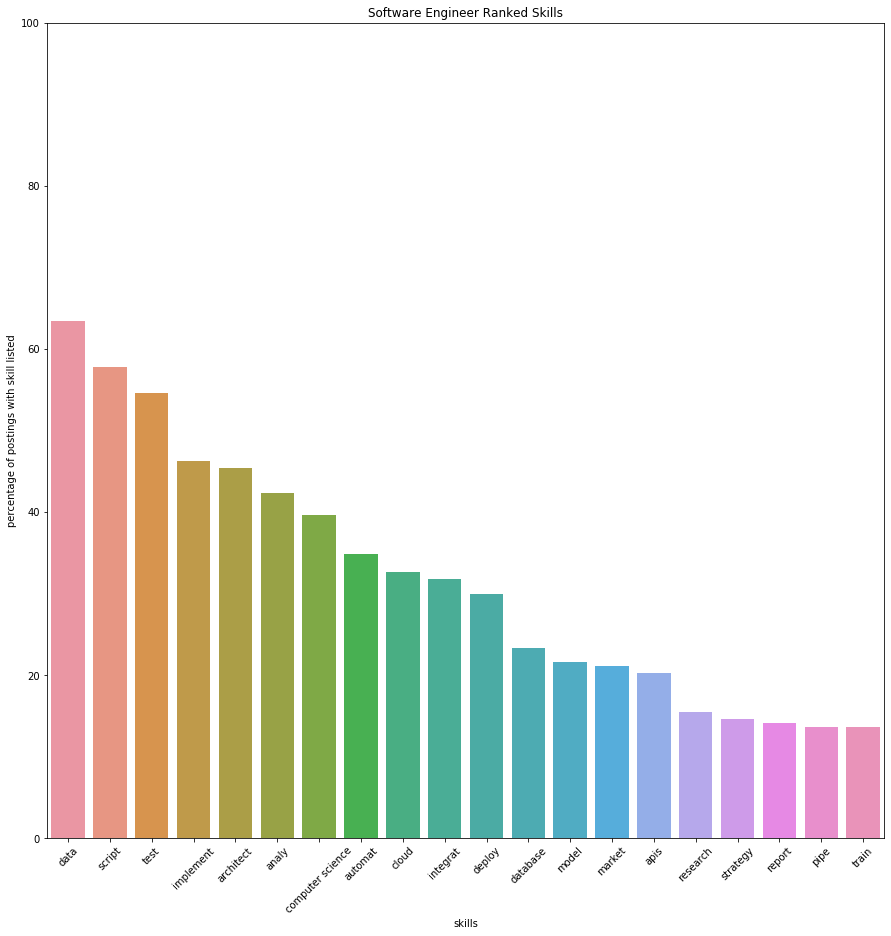

In [132]:
df_se = df_perc.loc['software_engineer'].sort_values(ascending=False).head(20)
df_se = df_se.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='software_engineer', ax=ax, data=df_se)
plt.xticks(rotation=45);
plt.title('Software Engineer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

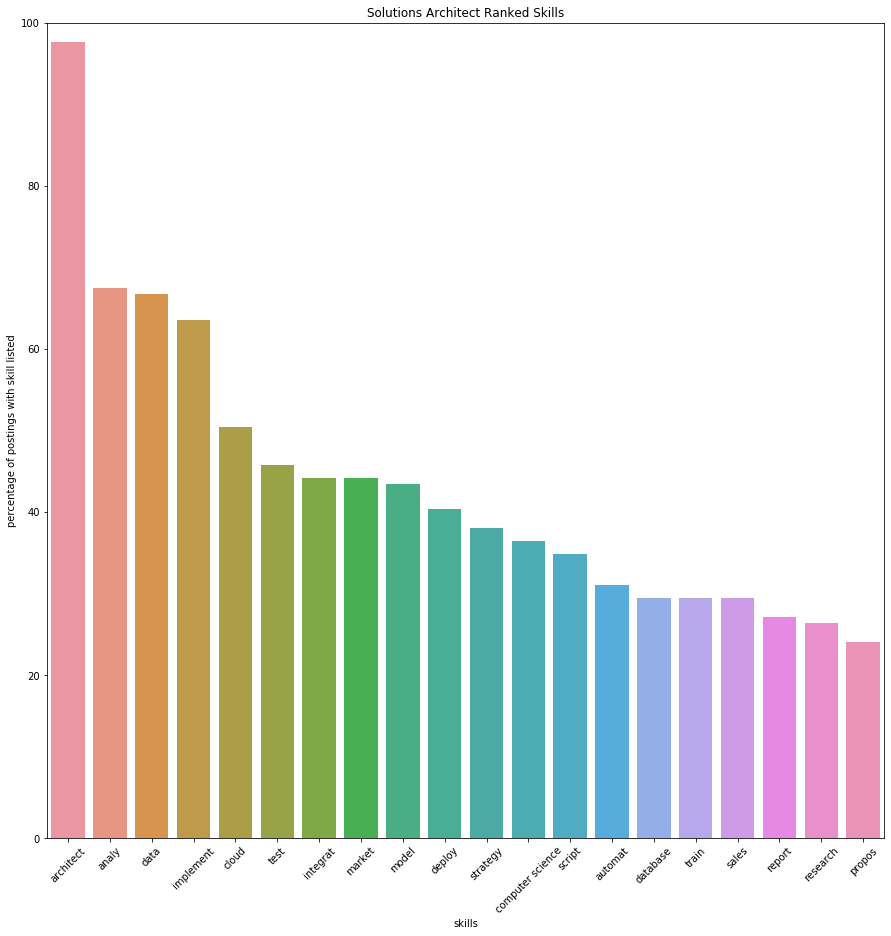

In [133]:

df_sa = df_perc.loc['solutions_architect'].sort_values(ascending=False).head(20)
df_sa = df_sa.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='solutions_architect', ax=ax, data=df_sa)
plt.xticks(rotation=45);
plt.title('Solutions Architect Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

               index  developer
0               data  63.235294
1             script  55.392157
2               test  54.411765
3          implement  48.039216
4          architect  43.137255
5              analy  39.705882
6   computer science  39.215686
7              cloud  33.333333
8             deploy  30.882353
9           integrat  30.392157
10           automat  29.901961
11          database  27.941176
12              apis  21.568627
13             model  19.117647
14            market  18.627451
15          research  15.686275
16              pipe  14.705882
17  machine learning  14.705882
18             train  13.725490
19          strategy  13.725490


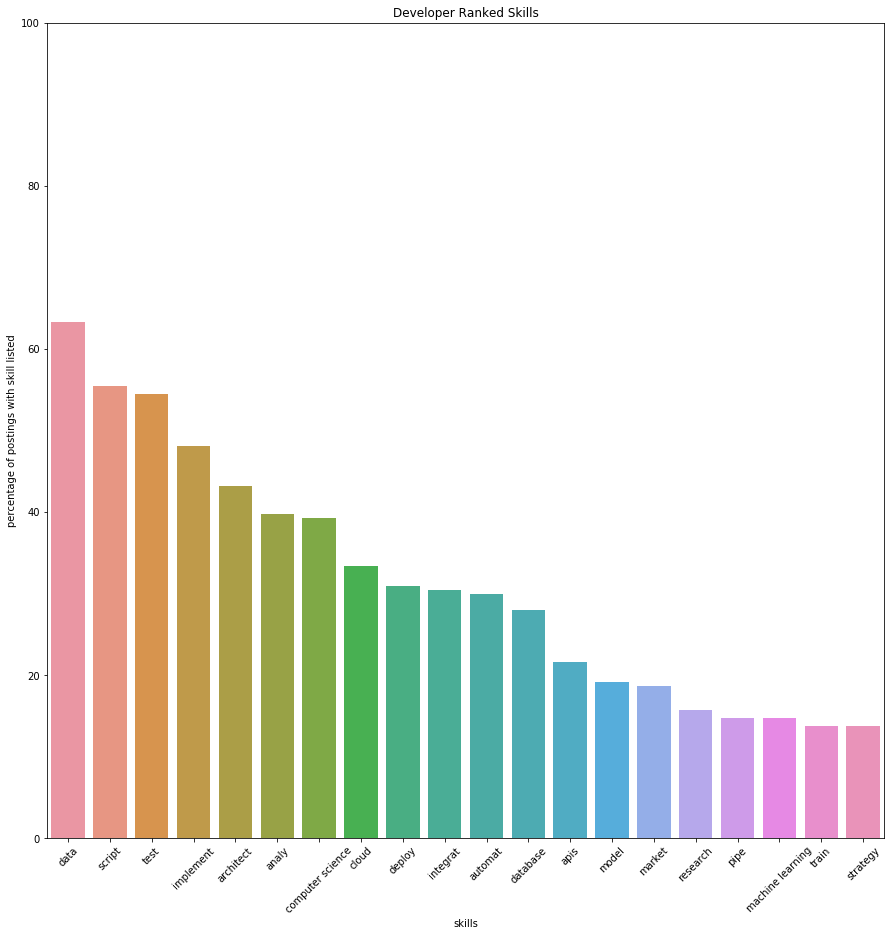

In [134]:
df_dev = df_perc.loc['developer'].sort_values(ascending=False).head(20)
df_dev = df_dev.reset_index()

print(df_dev)
a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='developer', ax=ax, data=df_dev)
plt.xticks(rotation=45);
plt.title('Developer Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

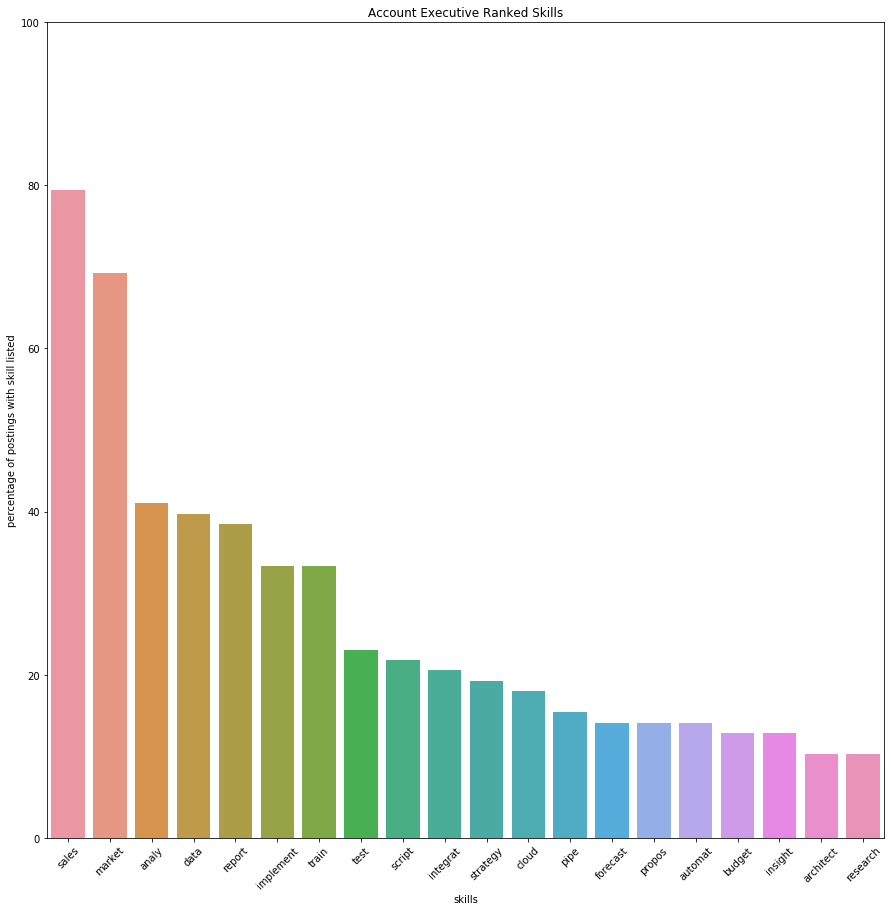

In [135]:
df_ae = df_perc.loc['account_executive'].sort_values(ascending=False).head(20)
df_ae = df_ae.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='account_executive', ax=ax, data=df_ae)
plt.xticks(rotation=45);
plt.title('Account Executive Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

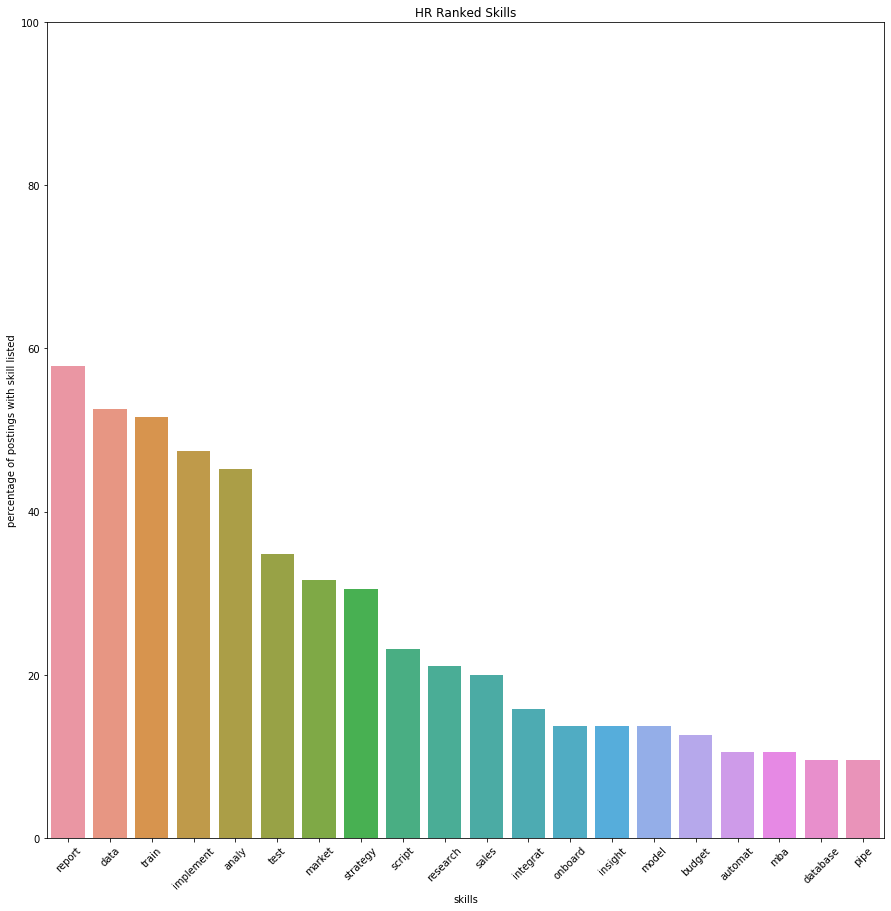

In [136]:
df_hr = df_perc.loc['human_resources'].sort_values(ascending=False).head(20)
df_hr = df_hr.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='human_resources', ax=ax, data=df_hr)
plt.xticks(rotation=45);
plt.title('HR Ranked Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));

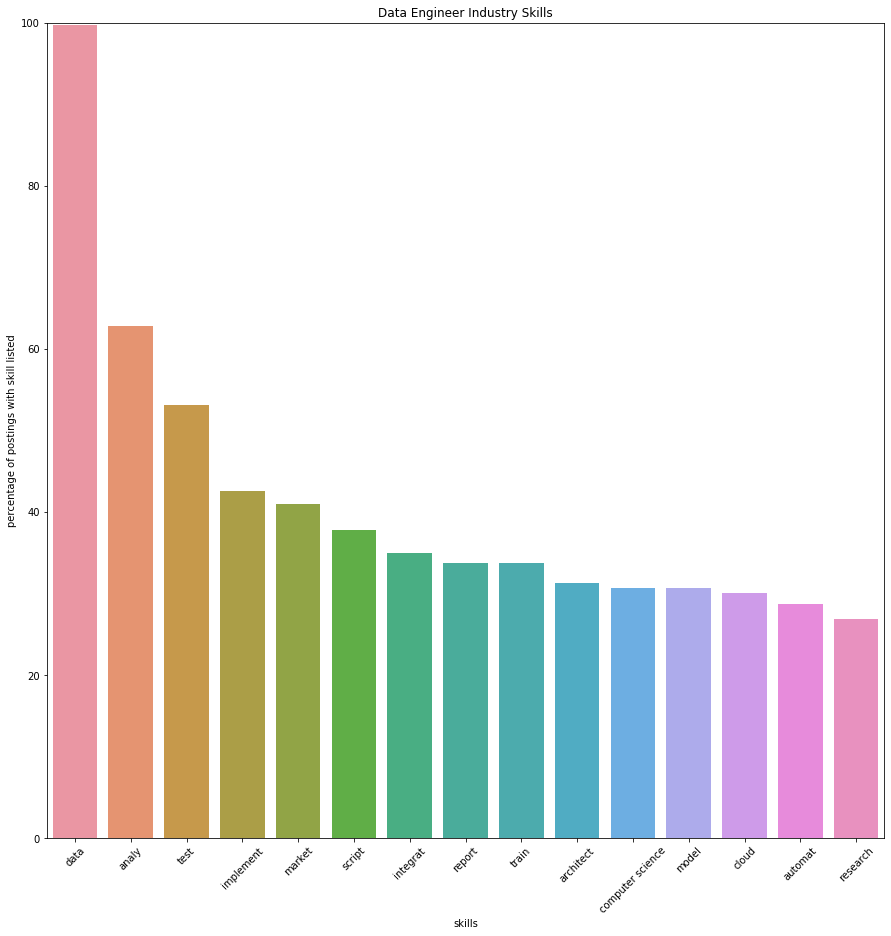

In [137]:
df_de = df_perc.loc['data_engineer'].sort_values(ascending=False).head(15)
df_de = df_de.reset_index()

a4_dims = (15, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='index', y='data_engineer', ax=ax, data=df_de)
plt.xticks(rotation=45);
plt.title('Data Engineer Industry Skills')
ax.set(xlabel='skills', ylabel='percentage of postings with skill listed', ylim=(0, 100));